In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
path = 'C:\Users\Seba\PycharmProjects\pandas_python3\pydata-book-master\ch02\usagov_bitly_data2012-03-16-1331923249.txt'

In [60]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json

In [4]:
records = [json.loads(line) for line in open(path)]

In [5]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [6]:
len(records)

3560

In [8]:
records[0]['tz']

u'America/New_York'

In [9]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [10]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [11]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [12]:
# genera las llaves de forma dinamica y crea un int para ir aumentando
# el contador si existe la llave o crea una nueva con contador = 1
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [13]:
counts = get_counts(time_zones)

In [15]:
counts['America/New_York']

1251

In [18]:
# sacar el top 10, genera una lista de tuplas con el valor de la cuenta 
# lo ordena y devuelve los ultimos n items
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [17]:
top_counts(counts)

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [19]:
# lo mismo usando standar library
from collections import Counter

In [20]:
counts = Counter(time_zones)

In [21]:
counts.most_common(10) # lol

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

In [22]:
# ahora con pandas 
from pandas import DataFrame, Series
import pandas as pd

In [23]:
frame = DataFrame(records)

In [26]:
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [27]:
tz_counts = frame['tz'].value_counts()

In [29]:
type(tz_counts)

pandas.core.series.Series

In [31]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

In [32]:
# limpiar los nan
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'

In [33]:
tz_counts_2 = clean_tz.value_counts()
tz_counts_2.head(10)

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
dtype: int64

In [36]:
tz_counts_2['Missing']

120

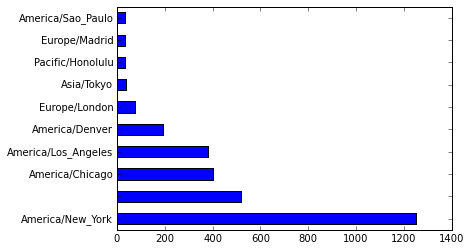

In [62]:
tz_counts[:10].plot(kind='barh', rot=0)

In [39]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [40]:
frame['a'][50]

u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [41]:
frame['a'][51]

u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [42]:
# estadisticas de una sola columna, se dropean lso na inmediatamente
results = Series([x.split()[0]] for x in frame.a.dropna())

In [43]:
results[:5]

0               [Mozilla/5.0]
1    [GoogleMaps/RochesterNY]
2               [Mozilla/4.0]
3               [Mozilla/5.0]
4               [Mozilla/5.0]
dtype: object

In [44]:
results.value_counts()[:8]

[Mozilla/5.0]                 2594
[Mozilla/4.0]                  601
[GoogleMaps/RochesterNY]       121
[Opera/9.80]                    34
[TEST_INTERNET_AGENT]           24
[GoogleProducer]                21
[Mozilla/6.0]                    5
[BlackBerry8520/5.0.0.681]       4
dtype: int64

In [45]:
# descomponer las top time zones en windows y no windows
cframe = frame[frame.a.notnull()]

In [47]:
import numpy as np

In [48]:
# separar los sistemas operativos
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows','Not Windows')

In [49]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [50]:
# agrupar los resultados en una tabla por time zone y su nueva lista de sistemas operativos
by_tz_os = cframe.groupby(['tz', operating_system])

In [53]:
type(by_tz_os)

pandas.core.groupby.DataFrameGroupBy

In [54]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [55]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


In [56]:
# usar sort para ordenarlos de forma ascendente
indexer = agg_counts.sum(1).argsort()

In [57]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [58]:
# usar take to seleccionar columnas en ese order y luego cortarlo en las ultimas 10
count_subset = agg_counts.take(indexer)[-10:]

In [59]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


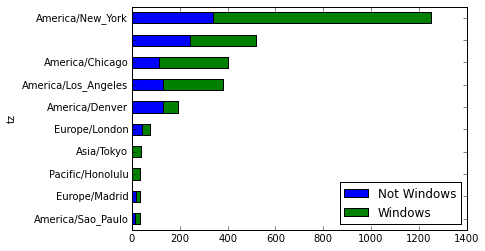

In [63]:
count_subset.plot(kind='barh', stacked=True)

In [64]:
# normalizar el subset para mejorar la visualizacion para que sumen 1
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

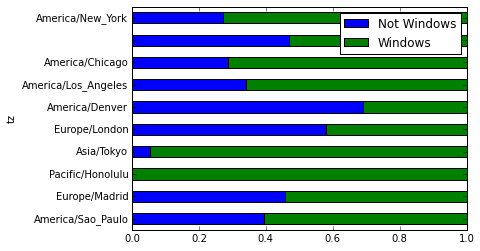

In [65]:
normed_subset.plot(kind='barh', stacked=True)